Task #1
=======

All we've got is $\eta \sim \mathrm{Uni}(0,1)$.

In [2]:
import numpy as np
import scipy.stats as sps
import pandas as pd

import seaborn as sns
sns.set_theme()

import math
import itertools 

***Goal***: $\xi_i \sim \mathrm{Bern}(p),\:i = 1,\dots,n$.  
***Implementation***: $\xi_i = \mathbb{I}(\eta < p) + \mathbb{I}(\eta \geqslant p)$

In [47]:
def gen_bernulli(p, *shape):
    """Generates random sample [X1, X2,.. X_{size}] where Xi ~ Bern(n,p)"""
    return 1*(np.random.rand(*shape) < p)

print(gen_bernulli(0.5,5,5))

[[0 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [0 1 1 1 0]
 [1 1 1 0 1]]


***Goal***: $\beta \sim \mathrm{Bin}(n,p)$  
***Implementation***: $\beta = \sum\limits_{i=1}^{n} \xi_i$.

In [37]:
def gen_binomial(n,p, *shape):
    """Generates random sample [X1, X2,.. X_{size}] where Xi ~ Bi(n,p)"""
    return np.sum(gen_bernulli(p,*shape,n),len(shape))

print(gen_binomial(10,0.5,5,5))

[[3 7 3 7 5]
 [3 5 5 6 3]
 [4 4 3 3 4]
 [7 4 5 4 4]
 [7 5 6 2 6]]


Illusration of binomial generator:

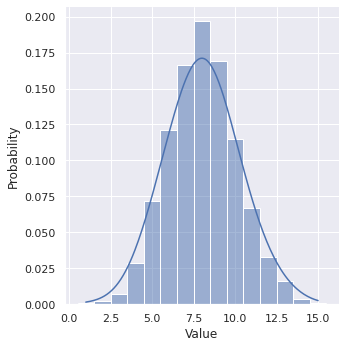

In [45]:
gen_bin = gen_binomial(16,0.5,1000)
df = pd.DataFrame({"Value": list(gen_bin)})
sns.displot(data=df, x="Value", discrete=True, stat="probability",
                            kde=True, kde_kws={"bw_adjust": 2})

***Goal***: $\gamma \sim \mathrm{Geom}(p)$  
***Implementation***: $\gamma = \max\{n \in \mathbb{N} \cup \{0\} : \xi_i = 0,\:i = 1,\ldots,n\}.$

In [8]:
def gen_geometrical(p, size):
    """Generates random sample [X1, X2,.. X_{size}] where Xi ~ Geom(p)"""
    while mask = 
    gen_bern = gen_bernulli(p)
    for i in itertools.count():
        if (i < size):
            attempts_number = 0
            while (next(gen_bern) != 1):
                attempts_number += 1
            yield attempts_number
        else:
            break
#end of gen_geometrical

print(list(gen_geometrical(0.5,5)))

[0, 1, 0, 1, 0]


##### Illustation of memorylessness  
Let $\gamma \sim \mathrm{Geom}$ be a random quantity defined on the probability space 
$\left(\Omega,\mathcal{A},\mathbb{P}\right)$.  
Memorylessness property:  
$\mathbb{P}(\gamma > m + n \mid \gamma \geqslant m) = \mathbb{P}(\gamma > n),
\quad \forall{m,n} \in \mathbb{N} \cup \{0\}.$  
That is equivalent to  
$\bigl. \gamma_m \sim \gamma ,\quad \forall{m} 
\in \mathbb{N} \cup \{0\},$  
where $\gamma_m := (\gamma \bigr|_{\Omega_m} - m), 
\quad \Omega_m = \gamma^{-1}(\gamma \geqslant m) \in \mathcal{A}$

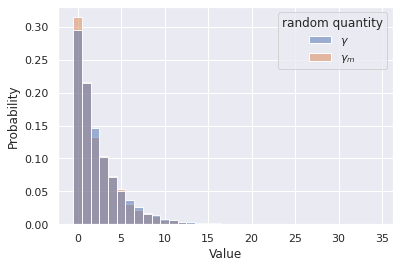

In [11]:
p, N = 0.3, 10000
m = 5;

smp_gamma   = list(gen_geometrical(p,N))
smp_gamma_m = [(val - m) for val in list(gen_geometrical(p,N)) if val >= m]
df = pd.concat([pd.DataFrame({"Value": smp_gamma,   "random quantity": r'$\gamma$'  }),
                pd.DataFrame({"Value": smp_gamma_m, "random quantity": r'$\gamma_m$'})],
                                                              ignore_index=True)
sns.histplot(data = df, x = "Value", hue = "random quantity", discrete = True, stat = 'probability', common_norm=False)
del p,N,m,smp_gamma,smp_gamma_m,df

$\theta = 1\cdot\mathbb{I}(\xi = 1) + -1\cdot\mathbb{I}(\xi = 0) = 2\cdot\xi - 1$  
$$Y(i) = \frac{S_i}{\sqrt{n}},\quad 
\text{where } S_i = \sum\limits_{j = 1}^{n} \theta_j$$

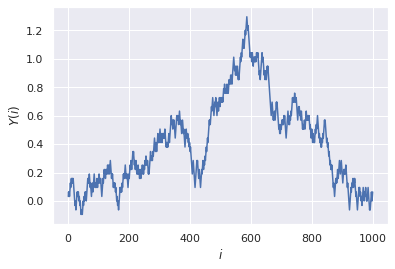

In [10]:
n = 1000
bern_gen = gen_bernulli(0.5,n)
Y = np.cumsum([(2*next(bern_gen) - 1) for i in range(n)])/math.sqrt(n)
df = pd.DataFrame({r'$i$': [i for i in range(1,n+1)], r'$Y(i)$': Y})
sns.lineplot(data=df, x=r'$i$', y=r'$Y(i)$')
del n,bern_gen,Y,df